Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [15]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
#read the dataset
wine=pd.read_csv('wine.csv')
print(wine.shape)
wine

(178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


# EDA

In [6]:
#check summary of dataframe
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
#check null values
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
#Generate descriptive statistics
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
#Checking Duplicate Rows
wine[wine.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [10]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

# Correlation Analysis & Visualization

In [11]:
#check correlation
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


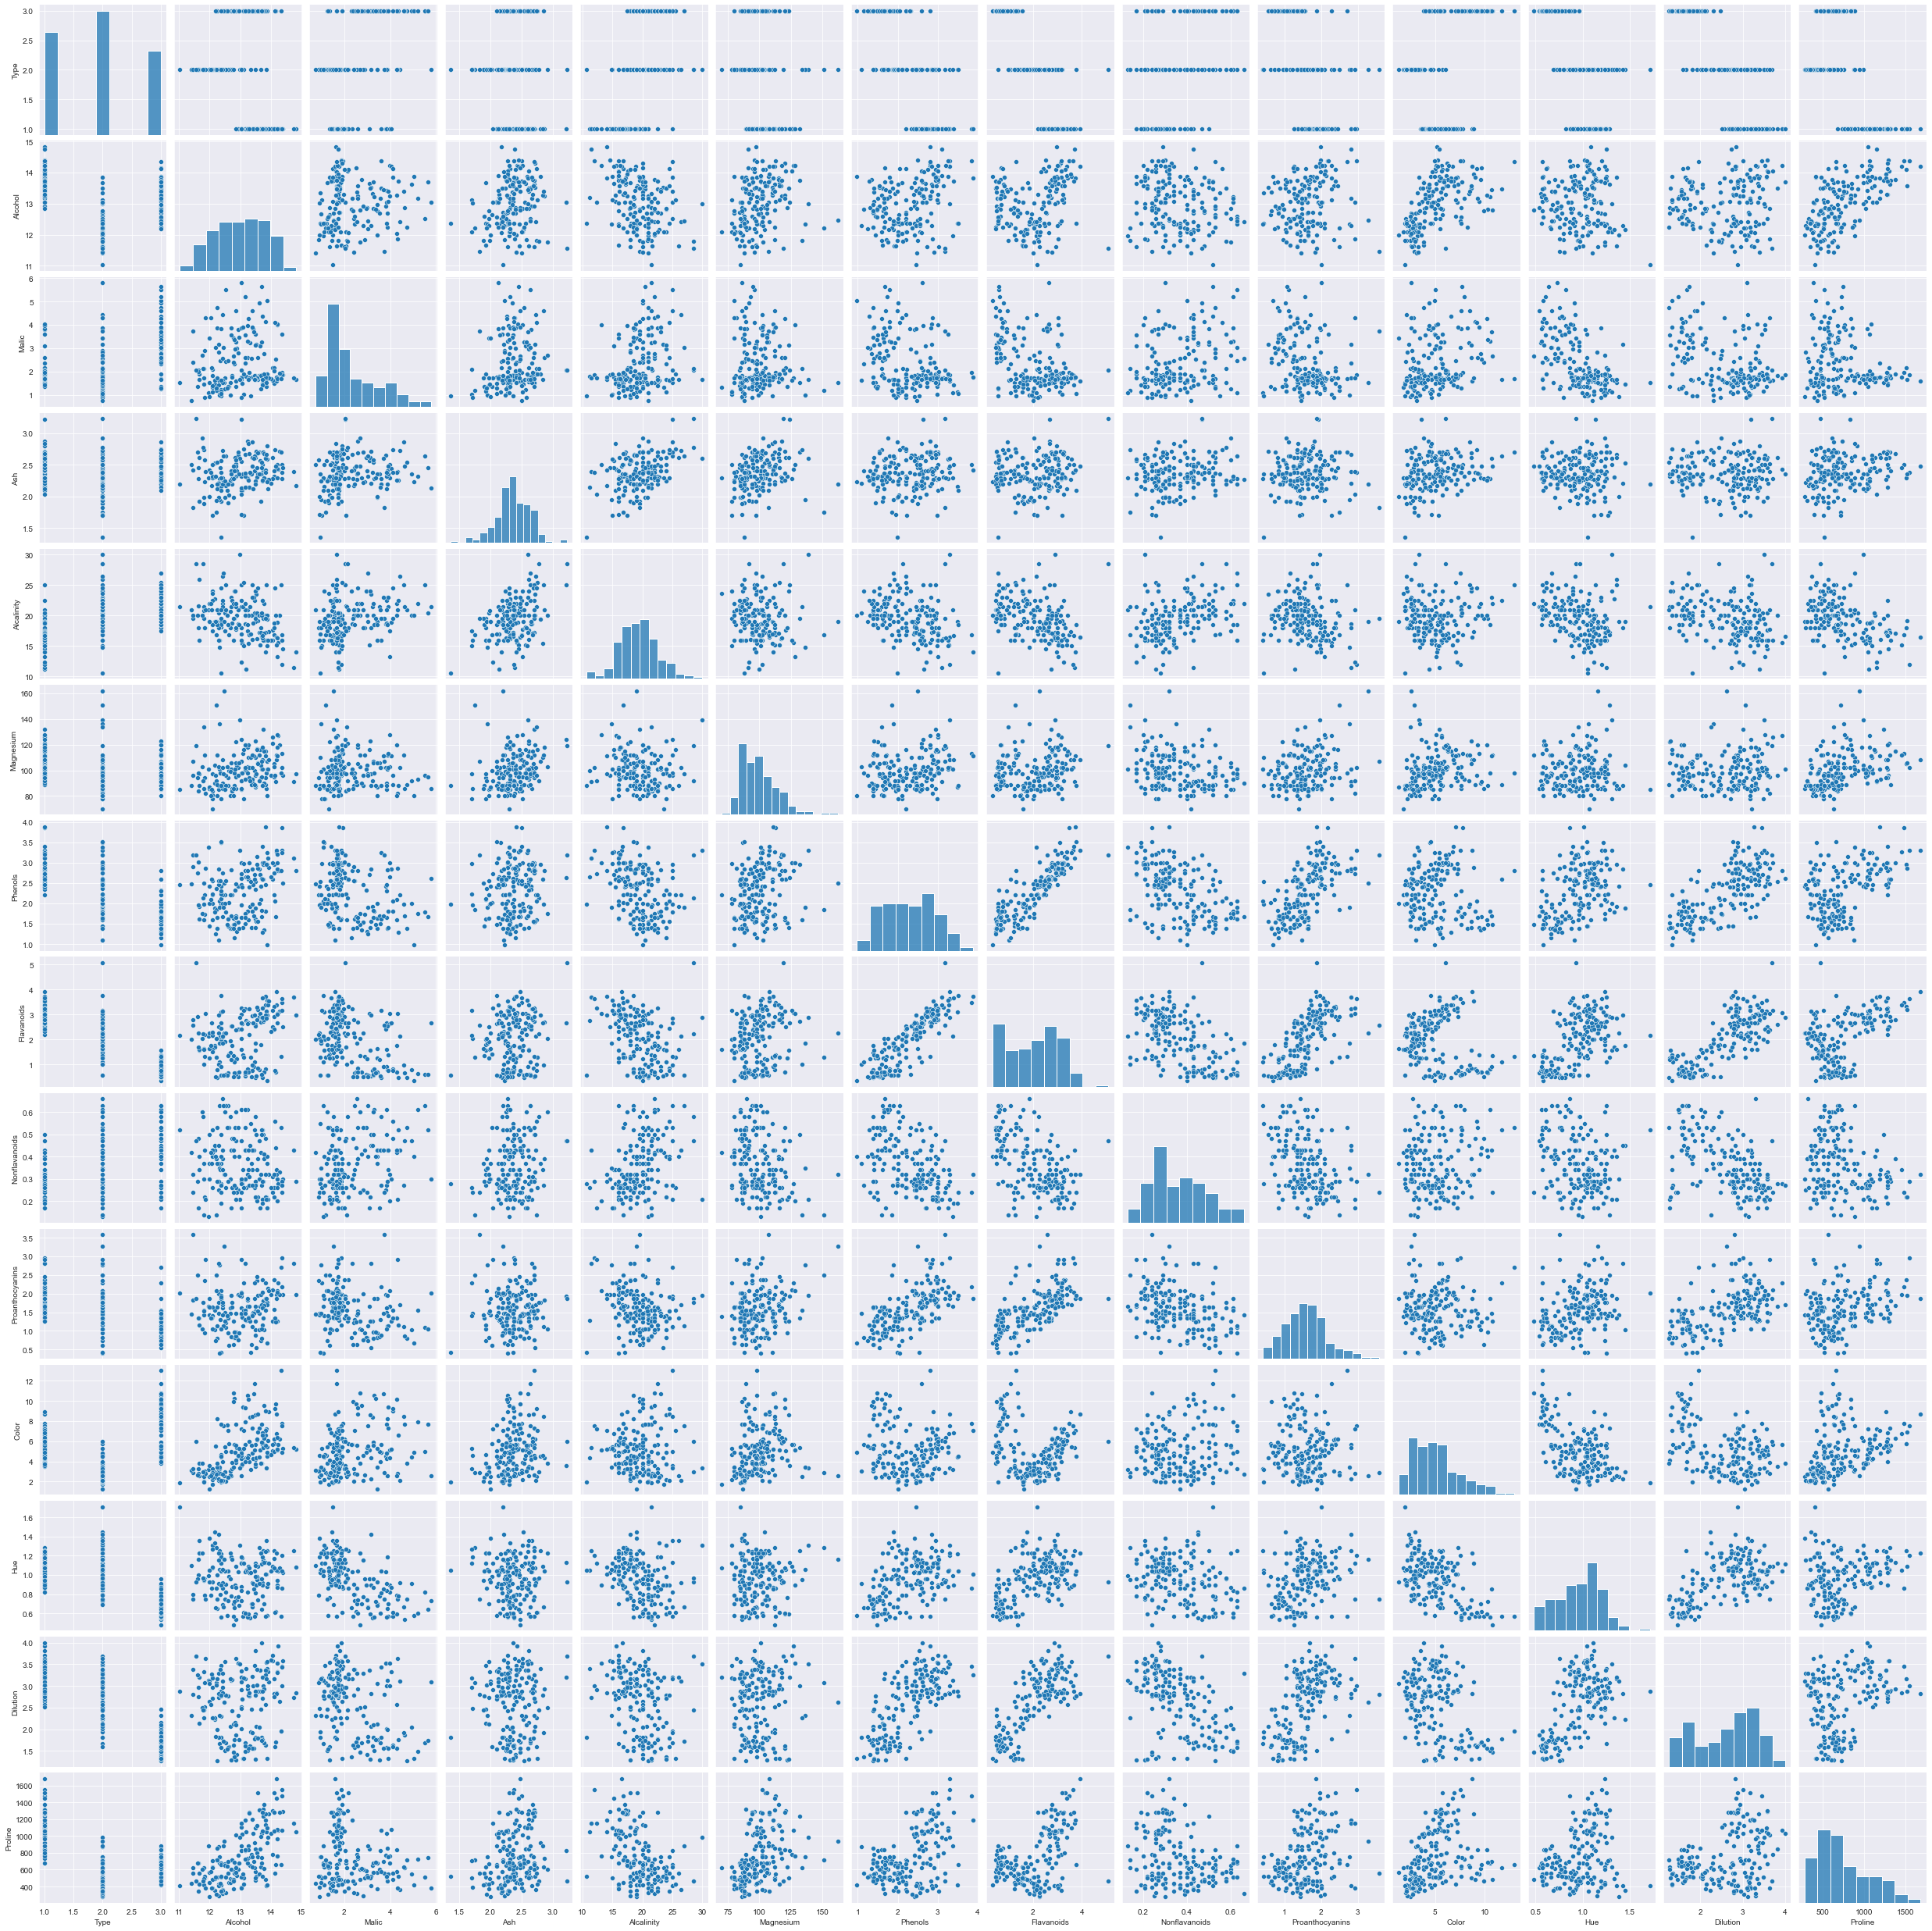

In [12]:

sns.set_style(style='darkgrid')
sns.pairplot(wine)

<AxesSubplot:>

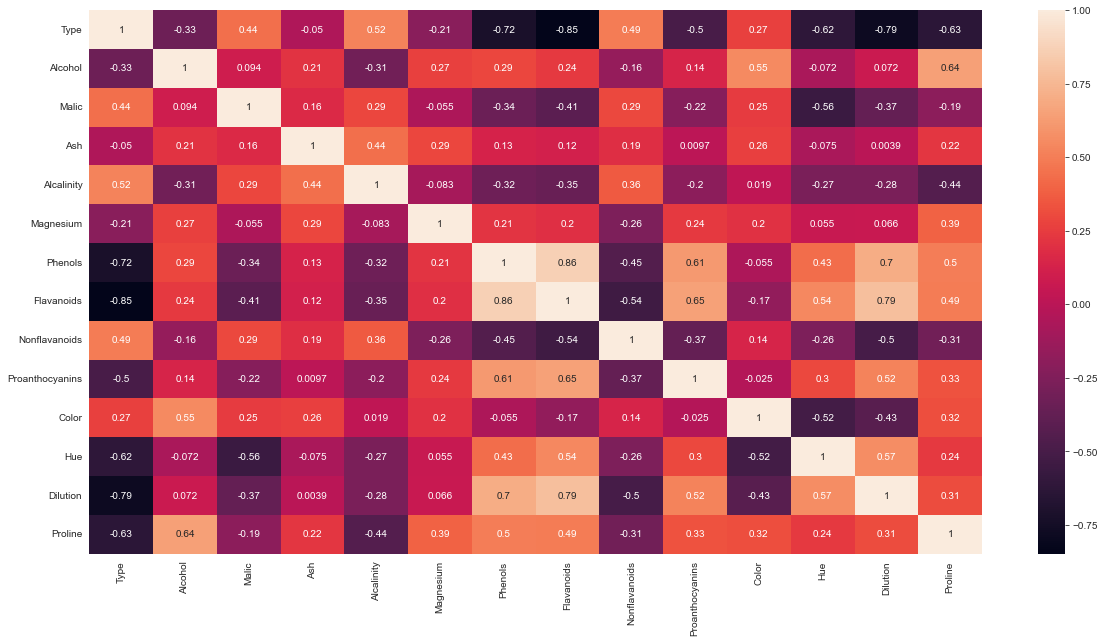

In [18]:
#making a heatmap to check correlation
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(),annot=True,xticklabels=True)

From above heatmap we conclude that:
    between Phenols & Flavanoids have high correlation that is 0.86
    as well as Flavanoids & Dilution have correlation is 0.79. These features are highly correlated.
    
Below we plot heatmap to highlight only highly correlated Features.


<AxesSubplot:>

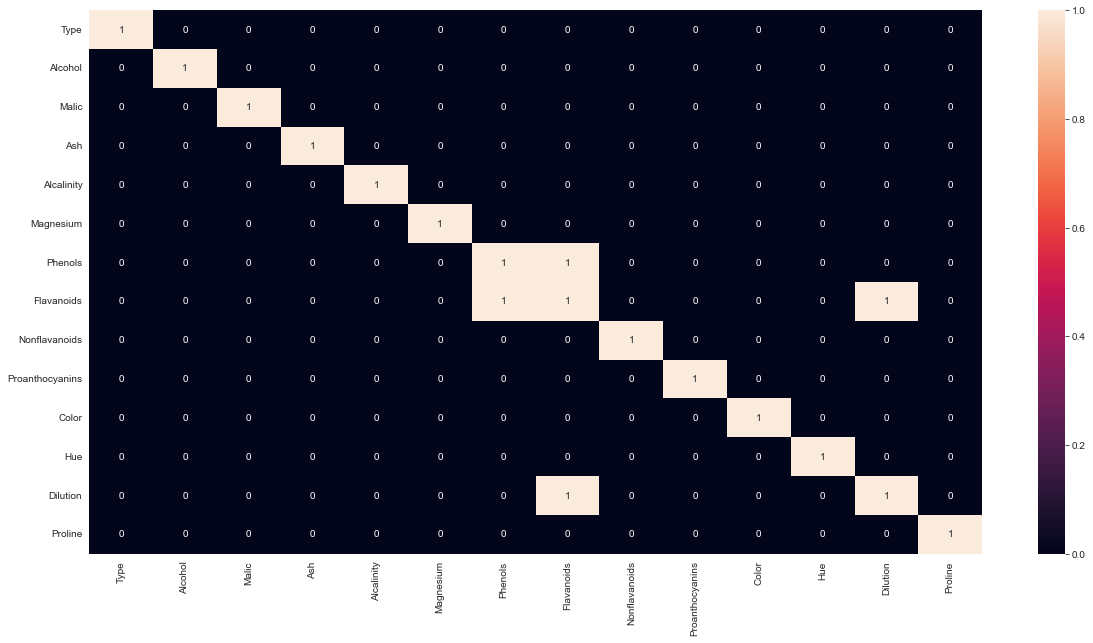

In [19]:
#making a heatmap to check correlation
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr()>0.7,annot=True,xticklabels=True)

#### Let's plot scatterplot of Highly correlated features

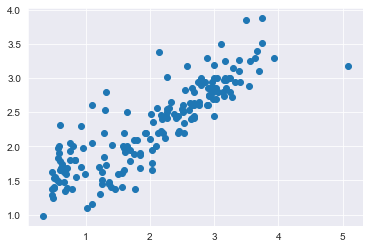

In [20]:
#Scatter plot of Flavanoids & Phenols
plt.scatter(x='Flavanoids',y='Phenols',data=wine)

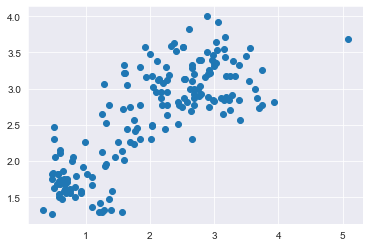

In [21]:
#Scatter plot of Flavanoids & Dilution
plt.scatter(x='Flavanoids',y='Dilution',data=wine)

# Scaling & Transformation of dataset





### class column we have ignored at the begining who shows it has 3 clusters



In [22]:
WINE=wine.iloc[:,1:]
WINE.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
#Converting data to numpy array
wine_ary=WINE.values
wine_ary

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [24]:
#Normalize the numerical Data
wine_norm=scale(wine_ary)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA Implementation

### Let's We will try with 5 clusters

In [25]:
#Apply Principal component analysis (PCA) fit-transform to dataset.
pca=PCA(n_components=5)
wine_pca=pca.fit_transform(wine_norm)
wine_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

In [26]:
# PCA Components matrix or covariance Matrix
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ]])

In [27]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_  # It gives explained varience of each PC.
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [28]:
# Cumulative variance of each PCA (cumulative means first and next both) 
var1 = np.cumsum(np.round(var,decimals = 4)*100) 
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16])

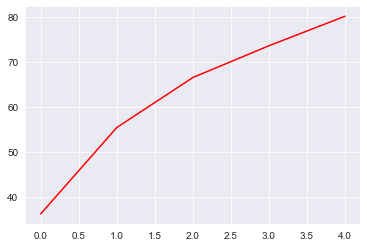

In [29]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [30]:
# Final Dataframe
final_df=pd.DataFrame(wine_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
final_df#(pd.concat([wine['Type'])wine_pca[:,0:3]

,PC1,PC2,PC3,PC4,PC5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762
7,2.059437,-1.608963,0.146282,-1.192608,0.076903
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553


<AxesSubplot:>

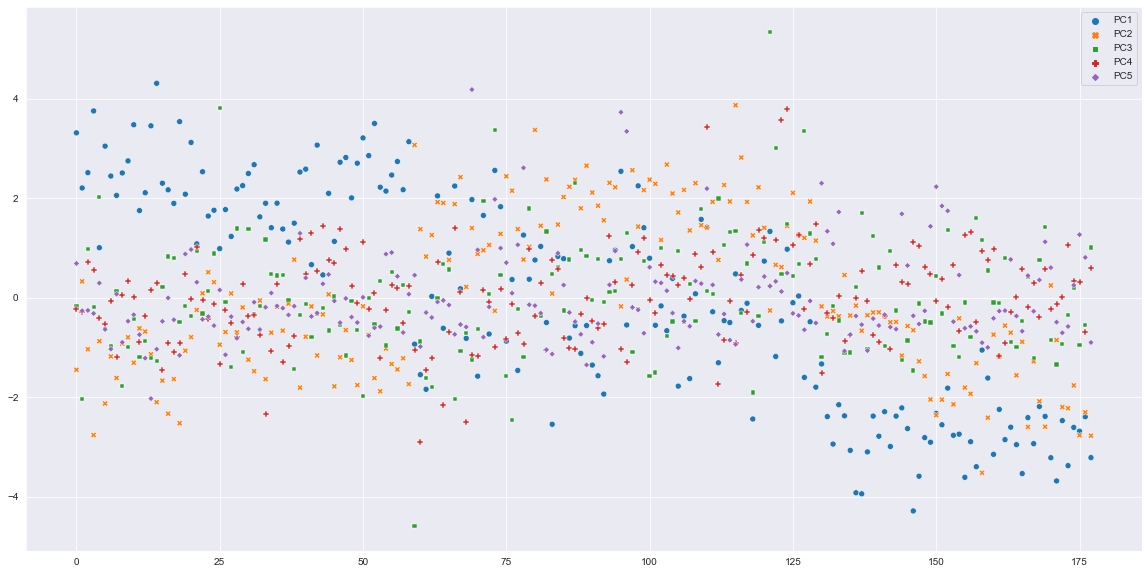

In [31]:
# #Visualiation of PCA's
fig=plt.figure(figsize=(20,10))
sns.scatterplot(data=final_df)               

# Applying Clustering Algorithms

## 1.Hierarchical Clustering

In [103]:
# Import Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [104]:
wine_h=wine_norm
wine_h

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

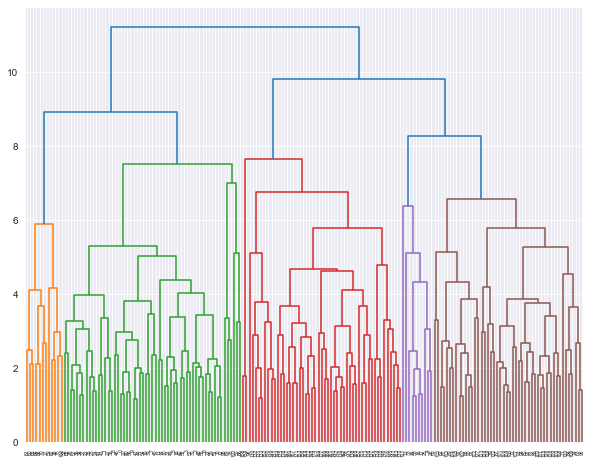

In [57]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(wine_h,'complete'))

In [105]:
#perform Hierarchical clustering(Agglomarative)
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')


In [106]:
y_hc=hc.fit_predict(wine_h)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [107]:
y_hc=pd.DataFrame(y_hc,columns=['clustersid']) 
y_hc['clustersid'].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

In [108]:
#checking silhouette score for Hierarchical Clustering
from sklearn.metrics import silhouette_score
silhouette_score(wine_h,y_hc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2774439826952265

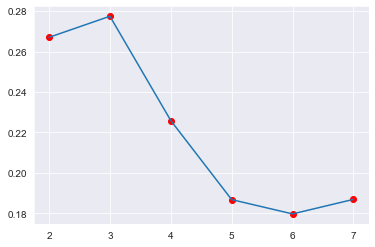

In [109]:
nc=[2,3,4,5,6,7]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    y=hc.fit_predict(wine_h)
    sc_score.append(silhouette_score(wine_h,y))
plt.plot(nc,sc_score)  
plt.scatter(nc,sc_score,color='red')


#### From above Silhouette Score Graph we conclude that the best number of cluster are 3.









#### Below we compared hierarchical algorithm clusters with clusters of original data.
      [Note:
      Original Data ClusterId column name= Type

      Hierarchical ClusterId Column name= H_clusterId]

In [110]:
# Assign clusters to the data set
wine1=wine.copy()
wine1.insert(loc =1,column='h_clusterId',value=y_hc, allow_duplicates= True)
wine1

,Type,h_clusterId,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,2,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,2,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,2,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,2,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,2,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,2,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


## 2. KMeans Clustering

In [111]:
#importing library for k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [112]:
wine_k=wine_norm

 As we already have normalized data,
 
 Use Elbow Graph to find optimum number of  clusters (K value) from K values range.

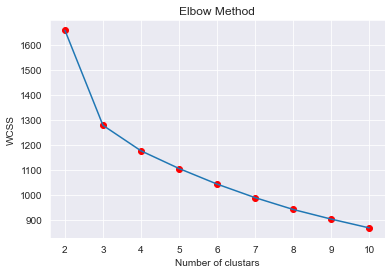

In [113]:

#perform KMeans clustering
#plot Elbow Chart to decide best number of clusters.
wcss=[]
for i in range (2,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(wine_k)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(2,11),wcss) 
plt.scatter(range(2,11), wcss, color = "red")
plt.title('Elbow Method')
plt.xlabel('Number of clustars')
plt.ylabel('WCSS')
plt.show()

#### From above Elbow Chart we conclude that 3 clusters are Best.

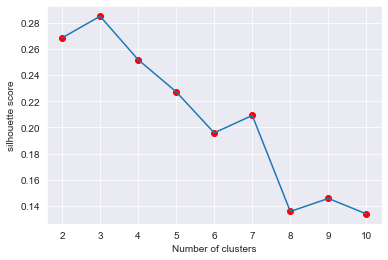

In [114]:
silhouettescore=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(wine_k)
    silhouettescore.append( silhouette_score(wine_k,kmeans.labels_))
    
plt.plot(range(2,11),silhouettescore)
plt.scatter(range(2,11), silhouettescore,color = "red")

plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

# Here we again get the same anlysis as above.

#### Here we again get the same anlysis as above.
#### From above plot we conclude that silhouette score is best at clusters 3.

#### Build kmeans Clustering algorithm using K=3

In [115]:
# Cluster algorithm using K=3
kmeans_clustering=KMeans(3,random_state=30).fit(wine_k)
kmeans_clustering

KMeans(n_clusters=3, random_state=30)

In [116]:
kmeans_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [117]:
y_kmeans=pd.DataFrame(kmeans_clustering.fit_predict(wine_k),columns=['clustersid'])#(y_hc,columns=['clustersid']) #(hc.fit_predict(wine_h),columns=['clustersid'])
y_kmeans['clustersid'].value_counts()

2    65
1    62
0    51
Name: clustersid, dtype: int64

In [118]:
#checking silhouette score for KMeans Clustering
from sklearn.metrics import silhouette_score
silhouette_score(wine_k,kmeans_clustering.labels_)

0.2848589191898987

KMeans gives Best Silhouette score than hierarchical Clustering

#### Below we compared KMeans algorithm clusters with clusters of original data. 





 [Note:

  Original Data ClusterId column name= Type

  KMeans ClusterId Column name= k_clusterId]

In [120]:
# Assign clusters to the data set
wine2=wine.copy()
wine2.insert(loc =1,column='k_clusterId',value=kmeans_clustering.labels_, allow_duplicates= True)
wine2

,Type,k_clusterId,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


#### Conclusion:

   By applying Hierarchical & KMeans algorithm we conclude that 3 number of clusters are best in that case.
   The silhouette score of KMeans is better than Hierarchical.
     
   In original data there are 3 clusters (3 types), by applying Hierarchical & KMeans Algorithm we come to know that 3  clusters are best. 
   
   we have obtained same number of clusters with the original data

## Now we do PCA Implementation by using 3 clusters 

In [121]:
#Apply Principal component analysis (PCA) fit-transform to dataset.
pca=PCA(n_components=3)
New_wine_pca=pca.fit_transform(wine_norm)
New_wine_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [122]:
# The amount of variance that each PCA explains is 
variance= pca.explained_variance_ratio_  # It gives explained varience of each PC.
variance

array([0.36198848, 0.1920749 , 0.11123631])

In [123]:
# Cumulative variance of each PCA (cumulative means first and next both) 
variance1 = np.cumsum(np.round(variance,decimals = 4)*100) 
variance1

array([36.2 , 55.41, 66.53])

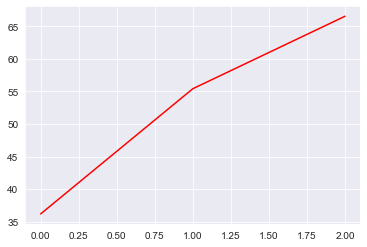

In [124]:
# Variance plot for PCA components obtained 
plt.plot(variance1,color="red")

In [125]:
# Final Dataframe
final_pca=pd.DataFrame(New_wine_pca,columns=['PC1','PC2','PC3'])
final_pca


,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
5,3.050254,-2.122401,-0.629396
6,2.449090,-1.174850,-0.977095
7,2.059437,-1.608963,0.146282
8,2.510874,-0.918071,-1.770969
9,2.753628,-0.789438,-0.984247


<AxesSubplot:>

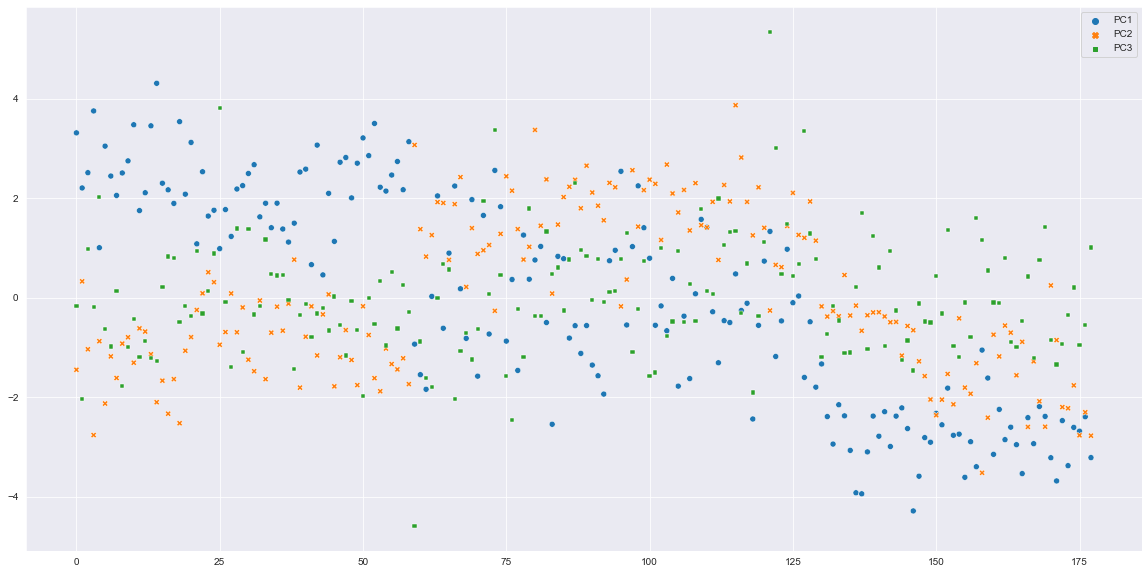

In [127]:
 #Visualiation of PCA's
fig=plt.figure(figsize=(20,10))
sns.scatterplot(data=final_pca) 